## Facial Keypoints Recognition Using CNN

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in an image - there are 15 keypoints marked in each image. They mark important areas of the face - the eyes, corners of the mouth, the nose, etc. Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

In [2]:
from Facial_Keypoint_Detection.utils import *
from keras.models import load_model
import matplotlib.pyplot as plt
import time
%matplotlib inline

Using TensorFlow backend.


In [4]:
# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


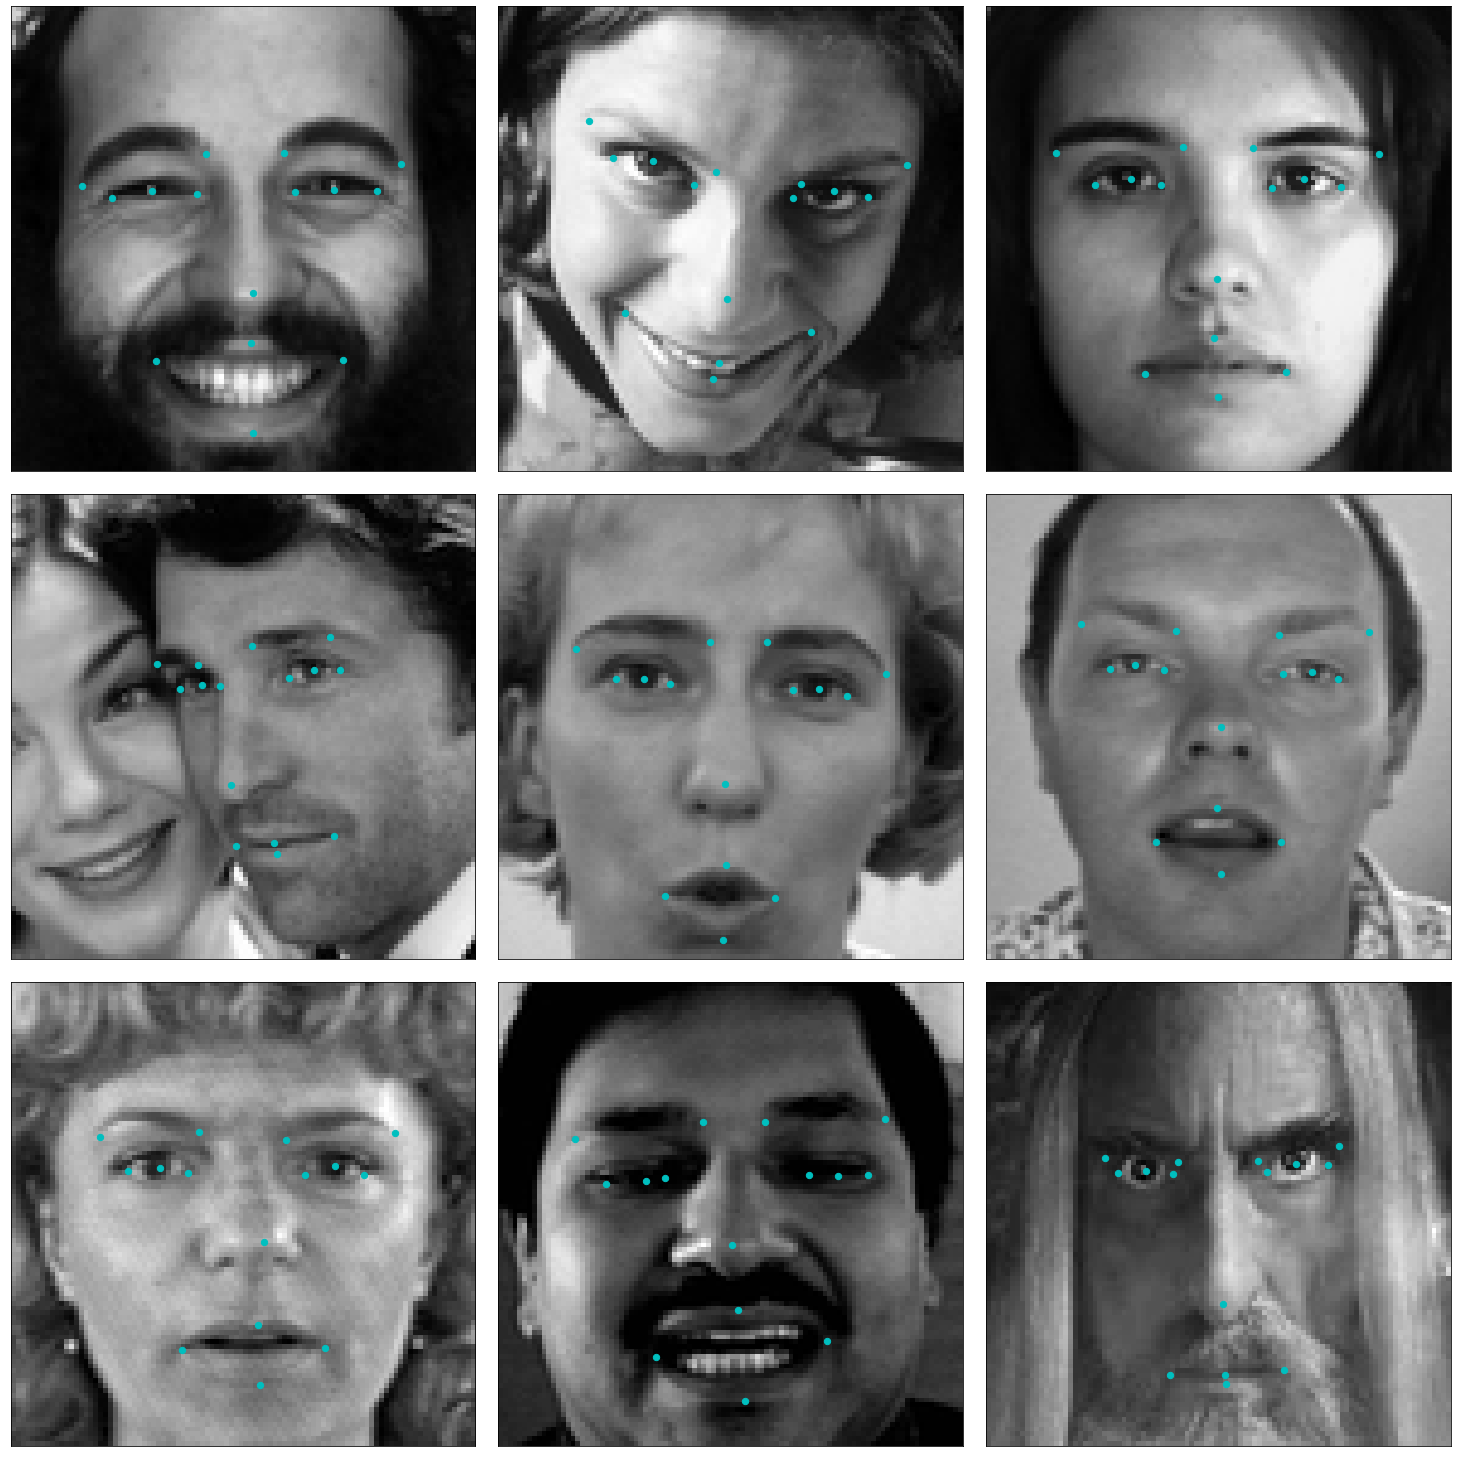

In [83]:

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

## Building CNN Architecture

In this section, you will specify a neural network for predicting the locations of facial keypoints. The CNN network should accept a $96 \times 96$ grayscale image as input, and it should output a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.

In [10]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model = Sequential()
model.add(Convolution2D(128,kernel_size=3,activation='relu',input_shape=(96,96,1)))
model.add(MaxPooling2D())
model.add(Convolution2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(30,activation = 'tanh'))
    
# Summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               15859968  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

**NOTE: The Model improved after i changed the activation in the dense layer from softmax function to tanh. otherwise the model's performance is stagnant at 70% accuracy. Its because my assumption was that it multiclass classification but afterwards i realized its a regression problem where the value of height and width varies based on faces, quantitatively.**

In [11]:

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

hist = model.fit(X_train,y_train,batch_size=64, epochs=50,
          validation_split=0.2)

##Save the model as model.h5
model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 74s 43ms/step - loss: 0.0583 - accuracy: 0.4428 - val_loss: 0.0052 - val_accuracy: 0.6963
Epoch 2/50
1712/1712 [==============================] - 75s 44ms/step - loss: 0.0108 - accuracy: 0.5590 - val_loss: 0.0041 - val_accuracy: 0.6963
Epoch 3/50
1712/1712 [==============================] - 74s 43ms/step - loss: 0.0078 - accuracy: 0.6402 - val_loss: 0.0037 - val_accuracy: 0.6916
Epoch 4/50
1712/1712 [==============================] - 73s 43ms/step - loss: 0.0059 - accuracy: 0.6595 - val_loss: 0.0025 - val_accuracy: 0.7033
Epoch 5/50
1712/1712 [==============================] - 72s 42ms/step - loss: 0.0050 - accuracy: 0.6910 - val_loss: 0.0023 - val_accuracy: 0.7056
Epoch 6/50
1712/1712 [==============================] - 79s 46ms/step - loss: 0.0041 - accuracy: 0.6875 - val_loss: 0.0021 - val_accuracy: 0.7220
Epoch 7/50
1712/1712 [==============================] - 82s 48ms/step - loss:

In [12]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


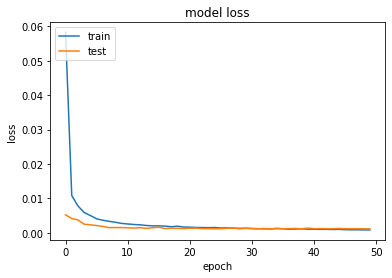

In [13]:
print(hist.history.keys())

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
model = load_model('my_model.h5')

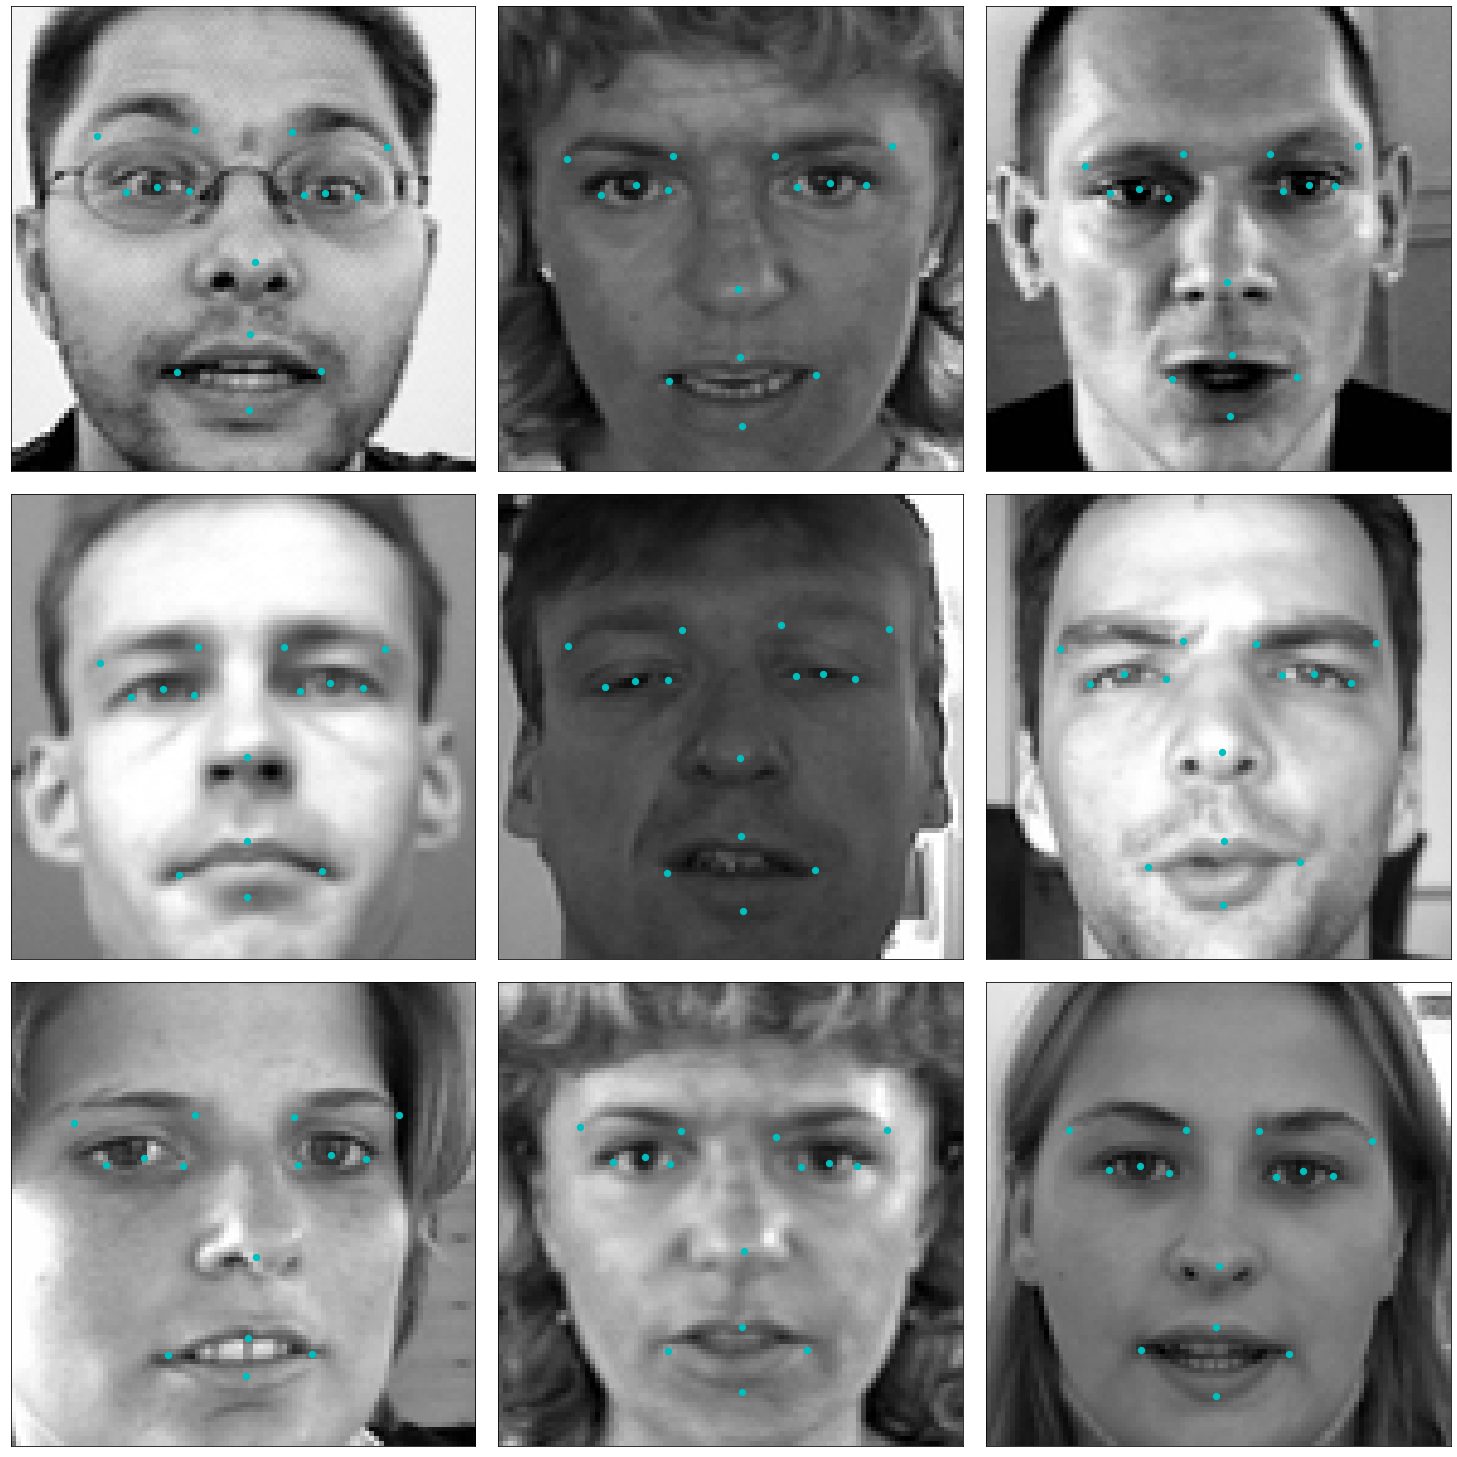

In [8]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

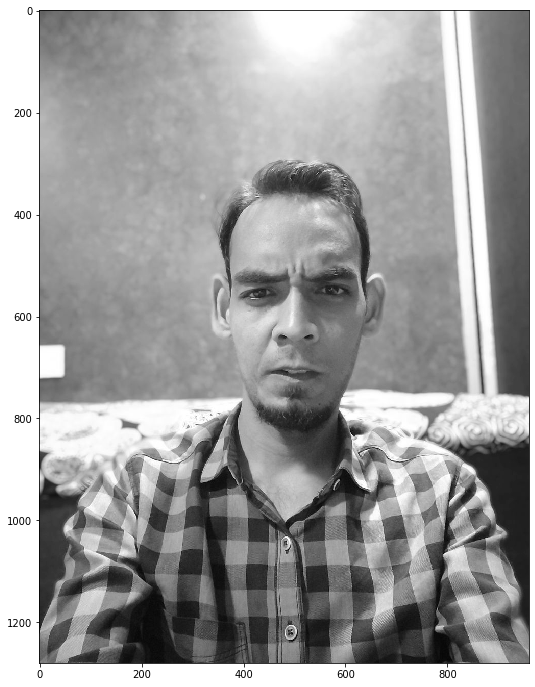

In [9]:
face = cv2.imread("/Users/mayurjain/Desktop/cv_images/face_eyes.jpg")
face_rgb = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
face_gray = cv2.cvtColor(face_rgb,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,12))
plt.imshow(face_gray,cmap='gray')

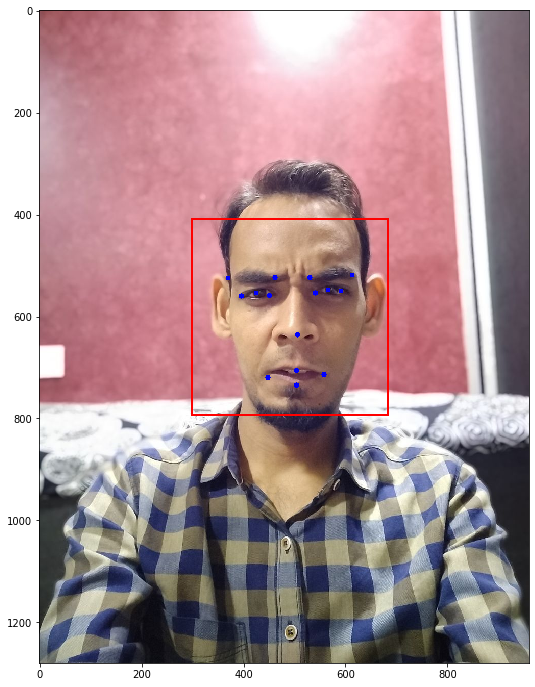

In [10]:
face_detection = cv2.CascadeClassifier("Facial_Keypoint_Detection/haarcascade_frontalface_default.xml")

faces = face_detection.detectMultiScale(face_gray, 2, 6)
img_copy = np.copy(face_rgb)
for x, y, w, h in faces:
    face_img = img_copy[y:y+h, x:x+w, :]

    # Pre-process
    face_reshaped = cv2.resize(face_img, (96, 96))
    gray = cv2.cvtColor(face_reshaped, cv2.COLOR_RGB2GRAY)

    gray_normalized = gray / 255.
    gray_normalized = gray_normalized[np.newaxis, :, :, np.newaxis]
    # Predict
    key_points = model.predict(gray_normalized)

    key_points = key_points * 48 + 48

    # Re-normalize
    x_coords = key_points[0][0::2]
    y_coords = key_points[0][1::2]

    x_coords = x_coords * w / 96 + x
    y_coords = y_coords * h / 96 + y

    # Add a red bounding box to the detections image
    cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,0,0), 3)
    for x, y in zip(x_coords,y_coords):
        cv2.circle(img_copy, (x, y), 5, (0,0,255), -1)

plt.figure(figsize=(10,12))
plt.imshow(img_copy)

In [ ]:
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy windows
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()

In [ ]:
laptop_camera_go()

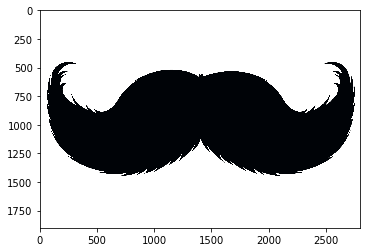

In [4]:
beard = cv2.imread("/Users/mayurjain/Desktop/cv_images/mucha2.png", cv2.IMREAD_UNCHANGED)
plt.imshow(beard)

In [5]:
#face_rgb.shape

In [6]:
print ('The beard image has shape: ' + str(np.shape(beard)))

The beard image has shape: (1900, 2800, 4)


In [7]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = beard[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

the alpha channel here looks like
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 the non-zero values of the alpha channel look like
(array([ 452,  452,  452, ..., 1445, 1445, 1445]), array([ 233,  234,  235, ..., 2106, 2107, 2108]))


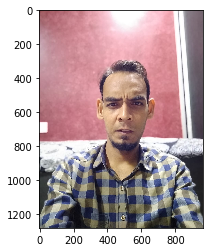

In [8]:
image = cv2.imread('/Users/mayurjain/Desktop/cv_images/face_eyes.jpg')
# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Plot the image
plt.imshow(image)

(1280, 960, 4)


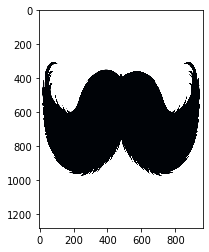

In [9]:
reshaped_beard = cv2.resize(beard, (image.shape[1], image.shape[0]))
print(reshaped_beard.shape)
plt.imshow(reshaped_beard[:,:,:3])

In [10]:
def detect_keypoints(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('Facial_Keypoint_Detection/haarcascade_frontalface_default.xml')

    # Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 2, 6)

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(image)

    num_face_keypoints = []
    
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        face_img = image_with_detections[y:y+h, x:x+w, :]

        # Pre-process
        face_reshaped = cv2.resize(face_img, (96, 96))
        gray = cv2.cvtColor(face_reshaped, cv2.COLOR_RGB2GRAY)

        gray_normalized = gray / 255.
        gray_normalized = gray_normalized[np.newaxis, :, :, np.newaxis]

        # Predict
        key_points = model.predict(gray_normalized)

        key_points = key_points * 48 + 48

        # Re-normalize
        x_coords = key_points[0][0::2]
        y_coords = key_points[0][1::2]

        x_coords = x_coords * w / 96 + x
        y_coords = y_coords * h / 96 + y

        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

        num_face_keypoints.append((x_coords, y_coords))
        
    return num_face_keypoints, image_with_detections

In [11]:
def warp(image, dest_points):

    src_points = np.float32([[0, 0],
                             [0, 1279],
                             [959, 1279],
                             [959, 0]])
    
    M = cv2.getPerspectiveTransform(src_points, dest_points)
    image_size = (image.shape[1], image.shape[0])
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    return warped

In [12]:
def beard_overlay(image):
    keypoints, image_with_detections = detect_keypoints(image)
    image_with_beard = np.copy(image)
    output = np.copy(image)

    for person_points in keypoints:
        important_points_x, important_points_y = person_points
        h = (important_points_y[14] - important_points_y[12]) *5.0
        print(h)
#         dest_pts = np.float32([[important_points_x[11]-20, important_points_y[11]-h],
#                                [important_points_x[11]-20, important_points_y[11]+10],
#                                [important_points_x[12]+20, important_points_y[11]+10],
#                                [important_points_x[12]+20, important_points_y[11]-h]])

        dest_pts = np.float32([[important_points_x[12]-40, important_points_y[12]-h],
                               [important_points_x[12]-40, important_points_y[12]],
                               [important_points_x[11]+40, important_points_y[12]],
                               [important_points_x[11]+40, important_points_y[12]-h]])



        warped_beard = warp(reshaped_beard, dest_pts)

        mask = warped_beard[:,:,:3]
        mask[mask == 0] = 255

        output[mask != 255] = mask[mask != 255]

    return output

78.1683349609375


True

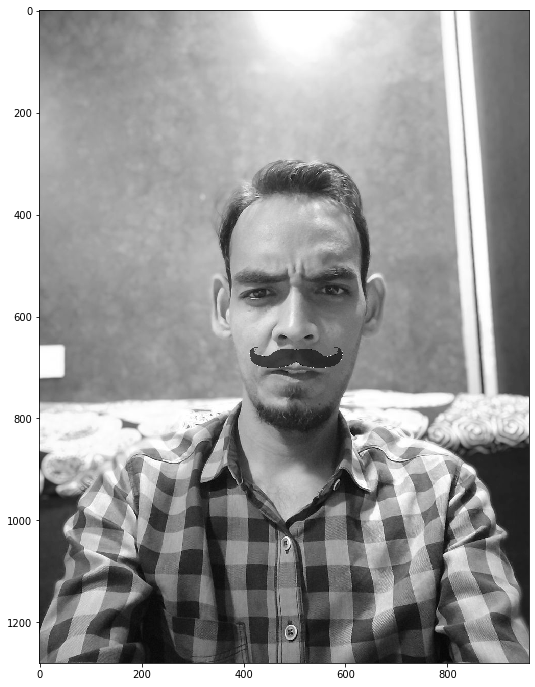

In [15]:
output = beard_overlay(image)
gray = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,12))
plt.imshow(gray,cmap='gray')
cv2.imwrite("/Users/mayurjain/Desktop/cv_images/may_mus.png",gray)

In [13]:
## Important to identify, what each of the keypoint represent in the real image.
## It will be helpful to identify, how the keypoints are generated.

keypoints, image_with_detections = detect_keypoints(face_rgb)
image = np.zeros((1024,1024,3), np.uint8)
count = 0
for ptx,pty in keypoints:

    for x,y in zip(ptx,pty):
        print(x,y)
        cv2.circle(image, (x, y), 5, (0,0,255), -1)
        count+=1
        if count == 15:
            break

plt.imshow(image)

NameError: name 'face_rgb' is not defined

In [15]:
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep video stream open
    while rval:
        # Plot image from camera with detections marked
        print(frame.shape)
        frame = beard_overlay(frame)
        #frame = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
        cv2.imshow("face detection activated", frame)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()

In [1]:
#laptop_camera_go()